In [1]:
from sklearn.cluster import KMeans  # 导入 sklearn.cluster.KMeans 类
import numpy as np
X = np.array([[1,2], [1,4], [1,0], [10,2], [10,4], [10,0]])
kmCluster = KMeans(n_clusters=2).fit(X)  # 建立模型并进行聚类，设定 K=2
print(kmCluster.cluster_centers_)  # 返回每个聚类中心的坐标
#[[10., 2.], [ 1., 2.]]  # print 显示聚类中心坐标
print(kmCluster.labels_)  # 返回样本集的分类结果
#[1, 1, 1, 0, 0, 0]  # print 显示分类结果
print(kmCluster.predict([[0, 0], [12, 3]]))  # 根据模型聚类结果进行预测判断
#[1, 0]  # print显示判断结果：样本属于哪个类别


[[ 1.  2.]
 [10.  2.]]
[0 0 0 1 1 1]
[0 1]


In [17]:
import pandas as pd
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as py
df = pd.read_csv('http://labfile.oss.aliyuncs.com/courses/764/three_class_data.csv',header=0)
# 删除class列
df.drop('class',axis=1)


,x,y
0,0.422221,0.545028
1,0.369920,0.581177
2,0.363025,0.581593
3,0.333464,0.552323
4,0.409722,0.550071
...,...,...
727,0.606909,0.547377
728,0.627545,0.536513
729,0.586346,0.546923
730,0.620430,0.555296


[np.float64(0.456910793727892), np.float64(0.6034036090631634), np.float64(0.5087142190053455), np.float64(0.46050874623070953), np.float64(0.4026740241577097), np.float64(0.3650325581456142), np.float64(0.3559757818762624), np.float64(0.35299053175679834), np.float64(0.35798864754762244), np.float64(0.3516152861401422)]


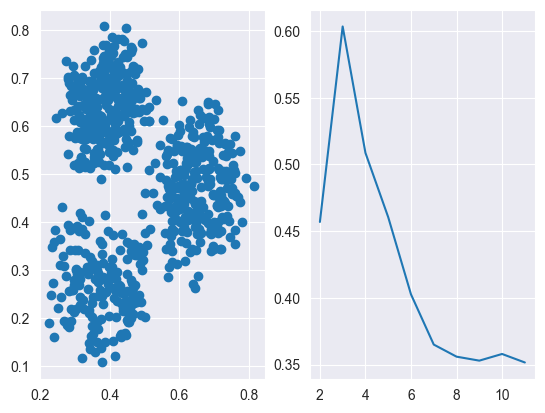

Sample 0: Cluster 10
Sample 1: Cluster 10
Sample 2: Cluster 10
Sample 3: Cluster 10
Sample 4: Cluster 10
Sample 5: Cluster 10
Sample 6: Cluster 10
Sample 7: Cluster 10
Sample 8: Cluster 10
Sample 9: Cluster 10
Sample 10: Cluster 10
Sample 11: Cluster 10
Sample 12: Cluster 6
Sample 13: Cluster 6
Sample 14: Cluster 6
Sample 15: Cluster 6
Sample 16: Cluster 6
Sample 17: Cluster 8
Sample 18: Cluster 7
Sample 19: Cluster 8
Sample 20: Cluster 8
Sample 21: Cluster 8
Sample 22: Cluster 8
Sample 23: Cluster 8
Sample 24: Cluster 8
Sample 25: Cluster 8
Sample 26: Cluster 8
Sample 27: Cluster 8
Sample 28: Cluster 8
Sample 29: Cluster 8
Sample 30: Cluster 8
Sample 31: Cluster 8
Sample 32: Cluster 8
Sample 33: Cluster 8
Sample 34: Cluster 8
Sample 35: Cluster 8
Sample 36: Cluster 8
Sample 37: Cluster 7
Sample 38: Cluster 8
Sample 39: Cluster 7
Sample 40: Cluster 7
Sample 41: Cluster 7
Sample 42: Cluster 8
Sample 43: Cluster 7
Sample 44: Cluster 7
Sample 45: Cluster 7
Sample 46: Cluster 7
Sample 47: 

In [18]:
x = df[["x", "y"]]

# 建立模型
score = []

# 依次计算 2 到 12 类的轮廓系数
for i in range(10):
    model = k_means(x, n_clusters=i + 2)
    score.append(silhouette_score(x, model[1]))
print(score)
plt.subplot(1, 2, 1) # 
plt.scatter(df['x'], df['y'])

plt.subplot(1, 2, 2)
plt.plot(range(2, 12, 1), score)
plt.show()
# model[1] 通常是每个样本的聚类标签
labels = model[1]

# 打印每个样本的聚类结果
for index, label in enumerate(labels):
    print(f"Sample {index}: Cluster {label}")
    

Cluster results:
 [0 0 0 1 1 1]


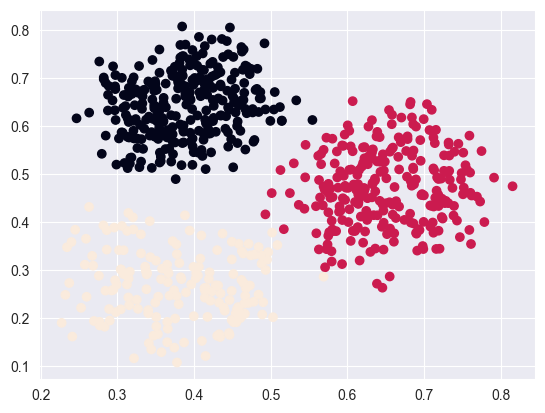

In [12]:
from sklearn.cluster import k_means
from matplotlib import pyplot as plt
import pandas as pd

# 导入数据


x = df[["x", "y"]]

# 建立模型
model = k_means(x, n_clusters=3)

# 绘图
plt.scatter(df['x'], df['y'], c=model[1])
# 打印每个样本点的聚类结果
print()

plt.show()

E:\pythonProject\.venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


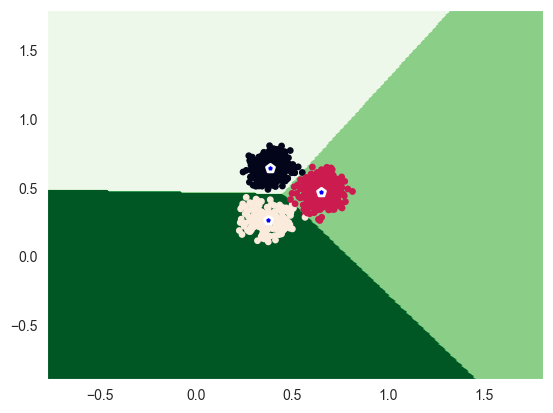

In [9]:
model = KMeans(n_clusters=3)
model.fit(x)

# 计算聚类过程中的决策边界
x_min, x_max = df['x'].min() - 1, df['x'].max() + 1
y_min, y_max = df['y'].min() - 1, df['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01), np.arange(y_min, y_max, .01))

result = model.predict(np.c_[xx.ravel(), yy.ravel()])

# 将决策边界绘制绘制出来
result = result.reshape(xx.shape)

plt.contourf(xx, yy, result, cmap=plt.cm.Greens)

plt.scatter(df['x'], df['y'], c=model.labels_, s=15)

# 绘制聚类中心点
center = model.cluster_centers_
plt.scatter(center[:, 0], center[:, 1], marker='p', linewidths=2, color='b', edgecolors='w', zorder=20)
plt.show()